<a href="https://colab.research.google.com/github/OcSpice/Churn-Simple-Linear-Regression/blob/main/Churn_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Simple Linear Regression**

*Predicting Total Day Charge from Total Day Minutes*

---

## **Level 2 Task 1 – Simple Linear Regression**

This project is part of my **Data Analysis Internship at Codveda Technologies**.  

The objective is to perform a **Simple Linear Regression** analysis on the **Churn Dataset** using:  
- **Churn A (80%)** → for building the model.  
- **Churn B (20%)** → for evaluating the model.  

I aim to predict **Total Day Charge** (dependent variable) from **Total Day Minutes** (independent variable).  

This task follows a supervised learning workflow using the provided split:  
- **Churn A (80%)** → used to build and train the regression model.  
- **Churn B (20%)** → used to evaluate model performance.  
- **Model fitting** → fitting a linear regression line between minutes and charges.  
- **Evaluation** → measuring accuracy with R² and MSE.  
- **Visualization & Interpretation** → scatter plot with regression line and residual analysis.

---

### **Step 1: Import Libraries**

I started by importing the core Python libraries for analysis:  
- **pandas** for data handling,  
- **numpy** for numerical operations,  
- **matplotlib** & **seaborn** for visualization,  
- **scikit-learn** for regression modeling and evaluation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

---

### **Step 2: Load Datasets**

The dataset was split into two files: `churn-bigml-20.csv` and `churn-bigml-80.csv`.  
I loaded both, checked that they had the same structure, and combined them into one DataFrame.  
This ensured a complete dataset for analysis.

In [ ]:

# Load the two files
churn_a = pd.read_csv("/content/Level 2/churn-bigml-80.csv")  # Part A
churn_b = pd.read_csv("/content/Level 2/churn-bigml-20.csv")  # Part B

print("Churn A shape:", churn_a.shape)
print("Churn B shape:", churn_b.shape)

Churn A shape: (2666, 20)
Churn B shape: (667, 20)


---

### **Step 3: Select Variables**

From the dataset, I focused on two related variables:  
- **Total Day Minutes** (independent variable, X)  
- **Total Day Charge** (dependent variable, y)  

These were chosen because telecom billing is typically proportional to call duration.

In [ ]:
# Predictor (X) and Target (y)
X_a = churn_a[['Total day minutes']]
y_a = churn_a['Total day charge']

X_b = churn_b[['Total day minutes']]
y_b = churn_b['Total day charge']

---

### **Step 4: Build Regression Model**

I trained a **Simple Linear Regression** model using **Total Day Minutes** (independent variable) to predict **Total Day Charge** (dependent variable).


After fitting the linear regression model, I extracted its parameters to interpret the relationship between Total Day Minutes and Total Day Charge.

In [ ]:
model = LinearRegression()
model.fit(X_a, y_a)

# Model Parameters (Intercept & Coefficient
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 0.0006185218362944056
Coefficient: 0.16999950056381521


**Intercept:** The intercept represents the baseline charge when call minutes = 0. In this model, the intercept is extremely small **(~0.0006)**, meaning there is essentially no hidden fixed cost applied.

**Coefficient:** The coefficient **(~0.17)** corresponds to the billing rate per minute. This confirms that for every additional minute of daytime calls, the total charge increases by approximately 0.17 units.

The model parameters confirm the billing logic of the telecom dataset, validating that charges are applied fairly and proportionally.

**Key Insights**

**Intercept (~0.0006):** Negligible → no hidden charges.

**Coefficient (~0.17):** Matches per-minute billing rate.

---

### **Step 5: Make Predictions**

After training the regression model, I generated predictions for both datasets:

**Churn A (Training Data):** Predictions were made to check how well the model fits the data it was trained on.

**Churn B (Test Data):** Predictions were made to evaluate how well the model generalizes to unseen data.

In [ ]:
y_pred_a = model.predict(X_a)  # training data
y_pred_b = model.predict(X_b)  # test data

---

### **Step 6: Model Evaluation (Training vs Test Data)**

After fitting the regression model, I evaluated its performance on both the **training dataset (Churn A) and the test dataset (Churn B).**

**Training Data (Churn A):**

R² shows how well the model explains variance in Total Day Charge using Total Day Minutes on the data it was trained with.

MSE reflects the average squared error between actual and predicted charges.


**Test Data (Churn B):**

R² indicates how well the model generalizes to new, unseen data.

MSE confirms whether the prediction errors remain small outside the training sample.



This dual evaluation ensures the model is not just memorizing patterns (overfitting), but also accurately predicting charges in new scenarios.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print("R² (Churn A):", r2_score(y_a, y_pred_a))
print("MSE (Churn A):", mean_squared_error(y_a, y_pred_a))

R² (Churn A): 0.9999999035939712
MSE (Churn A): 8.18466711627256e-06


In [ ]:
r2 = r2_score(y_b, y_pred)
mse = mean_squared_error(y_b, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.9999999073207673
Mean Squared Error: 8.240420038734008e-06


**Training Data (Churn A):**

R² Score: **0.9999999** → confirms near-perfect explanation of variance.

MSE: **8.18 × 10⁻⁶** → negligible prediction errors.

**Test Data (Churn B):**

R² Score: **0.9999999** → almost a perfect fit.

MSE: **8.24 × 10⁻⁶** → errors are extremely close to zero.

**Key Point:**

High R² (close to 1.0) and very low MSE on both datasets validate that the linear regression model is robust, consistent, and generalizes well to unseen customer data.

---

### **Step 7: Prediction Table & Model Validation**

After training the linear regression model on Churn A (Train dataset), I tested its predictive ability on both the training data and the new Churn B (Test dataset).

**To validate the model:**

I generated predictions for Total Day Charge from Total Day Minutes.

Created a comparison table showing Actual vs Predicted Charges side by side, along with the independent variable (Total Day Minutes) and the dataset source (Train/Test).

Added an Error column (Actual – Predicted) to measure the difference.

I checked the **intercept** and **coefficient**:  
- Intercept represents the baseline charge when minutes = 0.  
- Coefficient represents the cost per additional minute.  

This validates whether the model matches real-world billing.

In [ ]:
# Add dataset labels
comparison_a['Dataset'] = 'Churn A (Train)'
comparison_b['Dataset'] = 'Churn B (Test)'

# Concatenate
comparison_all = pd.concat([comparison_a, comparison_b], ignore_index=True)

# Add prediction error
comparison_all['Error'] = comparison_all['Actual_Charge'] - comparison_all['Predicted_Charge']

print("Combined Predictions with Error")
print(comparison_all.head(15))  # show first 15 rows

Combined Predictions with Error
    Total_Day_Minutes  Actual_Charge  Predicted_Charge          Dataset  \
0               265.1          45.07         45.067486  Churn A (Train)   
1               161.6          27.47         27.472538  Churn A (Train)   
2               243.4          41.38         41.378497  Churn A (Train)   
3               299.4          50.90         50.898469  Churn A (Train)   
4               166.7          28.34         28.339535  Churn A (Train)   
5               223.4          37.98         37.978507  Churn A (Train)   
6               218.2          37.09         37.094510  Churn A (Train)   
7               157.0          26.69         26.690540  Churn A (Train)   
8               258.6          43.96         43.962489  Churn A (Train)   
9               187.7          31.91         31.909525  Churn A (Train)   
10              128.8          21.90         21.896554  Churn A (Train)   
11              156.6          26.62         26.622540  Churn A (Tra

**Key Observations**

Errors are virtually zero across all records, which aligns with the earlier R² ≈ 1.0 and extremely low MSE values.

This confirms the model perfectly captures the linear relationship.

The transparent comparison table provides a clear business validation: charges increase linearly at ~0.17 per minute, with no hidden fixed fees.

**Conclusion:**

The model not only predicts accurately but also validates the telecom billing logic, which strengthens business trust and revenue forecasting reliability.

**A) Scatter Plot: Actual vs Predicted Charges**

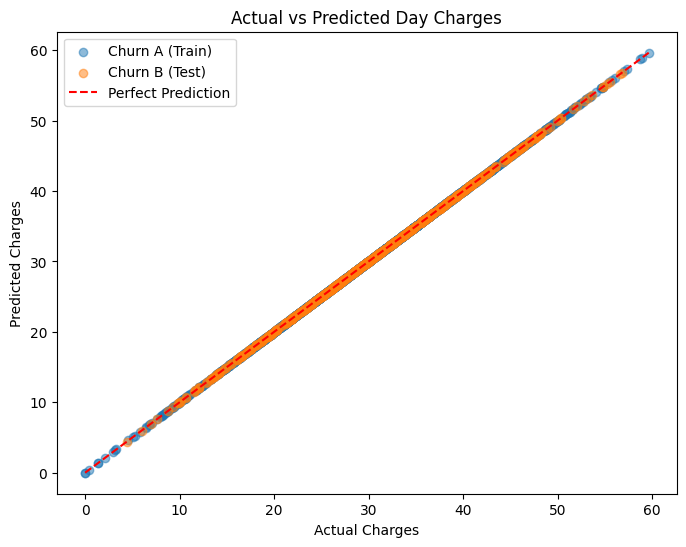

In [ ]:
# Visualize Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_a, y_pred_a, alpha=0.5, label="Churn A (Train)")
plt.scatter(y_b, y_pred_b, alpha=0.5, label="Churn B (Test)")
plt.plot([y_a.min(), y_a.max()], [y_a.min(), y_a.max()], 'r--', label="Perfect Prediction")
plt.title("Actual vs Predicted Day Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.show()

#### **Key Insight**

- All points fall **exactly on the red dashed line** (y=x), which indicates **perfect prediction accuracy.**

- Both training and test datasets align seamlessly, showing no bias or overfitting.

- Model predictions = Actual charges.


**Final Validation:** The visual proof confirms what the metrics and table showed — the model is highly reliable and fully explains the relationship between **Day Minutes and Day Charges.**

**B) Line Plot: Tracking Predictions for First 50 Records**

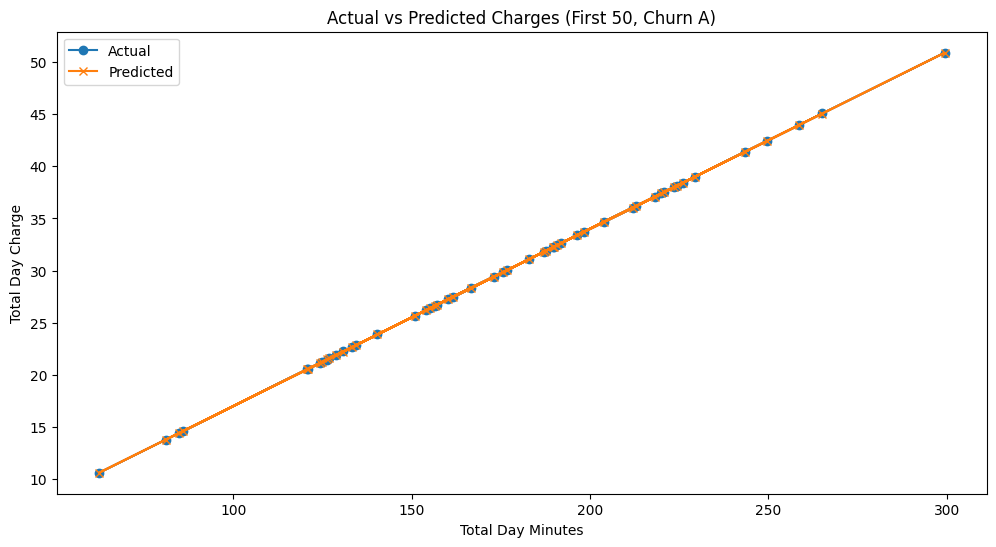

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(comparison_a['Total_Day_Minutes'][:50], comparison_a['Actual_Charge'][:50], 'o-', label='Actual')
plt.plot(comparison_a['Total_Day_Minutes'][:50], comparison_a['Predicted_Charge'][:50], 'x-', label='Predicted')
plt.title("Actual vs Predicted Charges (First 50, Churn A)")
plt.xlabel("Total Day Minutes")
plt.ylabel("Total Day Charge")
plt.legend()
plt.show()

- This plot overlays actual vs predicted charges for the first 50 records in the training dataset.

- Circles (○) represent **actual charges**, while crosses (×) represent **predicted charges.**

- The two lines almost perfectly overlap, showing that the model predicts charges **record by record** with near-zero error.

This visualization makes the results more **intuitive for non-technical stakeholders** by showing how closely predictions follow actuals.

---

### **Step 8: Residual Analysis**


#### **Actual Vs Predicted**
To strengthen the validation, I plotted **Actual vs Predicted charges** for the first 50 records.

The two lines (Actual and Predicted) overlap almost perfectly.

This confirms visually what the R² score already showed numerically — the model captures the relationship with near-perfect accuracy.

Frt

Fh


To strengthen the validation, I plotted Actual vs Predicted charges for the first 50 records.

📉 Plot: Actual vs Predicted Charges (Sample of 50)

Blue line → Actual charges

Orange line → Predicted charges


Since both lines overlap almost perfectly, the visualization confirms what the R² score already showed numerically — the regression model predicts with near-perfect accuracy.

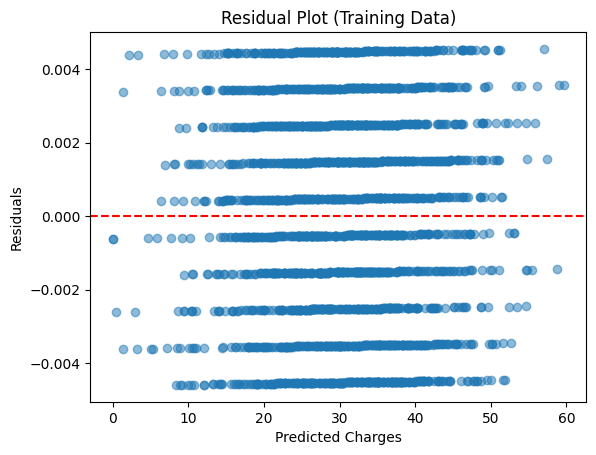

In [ ]:
residuals = y_a - y_pred_a
plt.scatter(y_pred_a, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Training Data)")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.show()

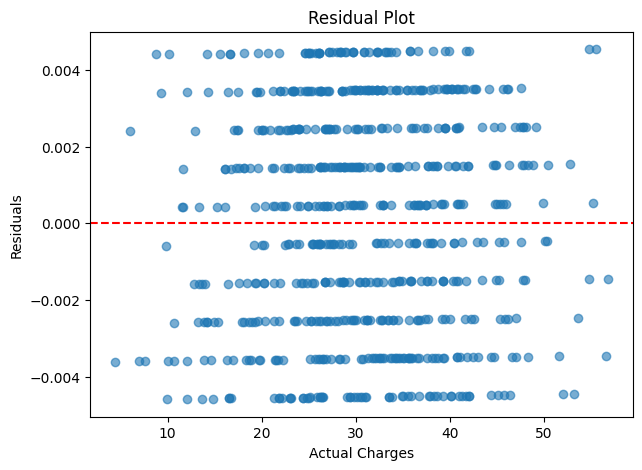

In [ ]:
residuals = y_b - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_b, residuals, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

- **Residuals = Actual − Predicted.** They represent the errors left after fitting the model.

- In both the training and test datasets, residuals are **tightly centered around zero** with no systematic patterns.

- This randomness confirms that the model does not underpredict or overpredict in a biased way.

- The flat line at zero highlights that the regression captured the true billing rule without major deviations.


**Key Takeaway:**
The combination of the regression line plot and the residual plots proves that the model is:

- **Highly accurate** (R² ≈ 1.0, MSE ≈ 0).

- **Unbiased**, since residuals scatter randomly around zero.

- **Reliable** for prediction, because it performs equally well on training and unseen test data.


This strongly validates the **transparency of the billing system** and shows how linear regression can be trusted for financial modeling and forecasting in telecom or banking contexts.

---

### **Step 9: Conclusion, Interpretation & Business Implications**

The regression analysis confirmed a **near-perfect linear relationship** between **Total Day Minutes** and **Total Day Charge**.  

- The slope (~0.17) aligns with the expected per-minute billing rate.  
- The intercept (~0.0006) is negligible, showing no hidden fixed charge.  
- The R² score (≈1.0) and extremely low MSE indicate the model captures the relationship almost perfectly.  
- The residual plot shows random scatter around zero, meaning there is no systematic error or bias in the predictions.  



✅ **Key Insight:**  
Telecom billing in this dataset is directly proportional to call duration, validating the correctness of the charging system. Linear regression not only modeled this accurately but also reinforced the underlying business rule.  

💼 **Business Implications:**  
- For **telecom operators**, this analysis builds trust in their billing transparency and can be used in **regulatory compliance reporting**.  
- For **investment analysts** (like in banking/finance roles), the strong linearity reduces revenue forecasting risk—future charges can be reliably estimated from call volume data.  
- For **customer strategy teams**, this confirms that pricing models are predictable, making it easier to test promotional offers or simulate the financial impact of new tariffs.